In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

from io import StringIO
from matplotlib.patches import Rectangle
from IPython.display import Image
import imageio
from itertools import cycle

In [2]:
def plot_scenario1_soln(title, soln):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")
    _, ax = plt.subplots()
    ax.add_patch(Rectangle((0, 5), 7.5, 10))
    ax.add_patch(Rectangle((12.5, 5), 7.5, 10))
    ax.plot(arr[:, 0], arr[:, 1], color="r")
    ax.plot(arr[:, 2], arr[:, 3], color="g")
    ax.plot(arr[:, 4], arr[:, 5], color="b")
    ax.plot(arr[:, 6], arr[:, 7], color="y")
    ax.set_xlabel("x position")
    ax.set_ylabel("y position")
    ax.set_title(title)
    ax.set_xlim(left=0, right=20)
    ax.set_ylim(bottom=0, top=20)
    plt.show()

def animate_scenario1(title, soln):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")

    def create_frame (i):

        fig, ax = plt.subplots()
        
        ax.add_patch(Rectangle((0, 5), 7.5, 10))
        ax.add_patch(Rectangle((12.5, 5), 7.5, 10))

        ax.set_xlabel("x position")
        ax.set_ylabel("y position")
        ax.set_title(title)
        ax.set_xlim(left=0, right=20)
        ax.set_ylim(bottom=0, top=20)

        ax.set_aspect(1)

        for j in range(0, 8, 2):
            plt.scatter(arr[i, j] , arr[i, j+1], s=1000)
            ax.plot(arr[i-1:i+1, j], arr[i-1:i+1, j+1])

        plt.savefig(f'images/scenario1_img_{i}.png', transparent = False, facecolor = 'white')
        plt.close()
    
    for i in range(len(arr)):
        create_frame(i)
        
    frames = []

    for i in range(len(arr)):
        image = imageio.v2.imread(f'images/scenario1_img_{i}.png')
        frames.append(image)

    imageio.mimsave('./scenario1.gif', frames, duration = 50, loop = 1) 


def plot_scenario2_soln(title, soln, robot_count=8):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")
    _, ax = plt.subplots()

    # Define base colors and line styles
    colors = cycle(["r", "g", "b", "y", "m", "c", "k"])
    line_styles = cycle(["-", "--", "-.", ":"])

    # Generate a list of unique style combinations for each robot
    styles = [next(colors) + next(line_styles) for _ in range(robot_count)]

    # Plot each robot's path with a unique style
    for j in range(0, robot_count * 2, 2):
        ax.plot(arr[:, j], arr[:, j+1], styles[j//2])

    ax.set_xlabel("x position")
    ax.set_ylabel("y position")
    ax.set_title(title)
    ax.set_xlim(left=-5, right=25)
    ax.set_ylim(bottom=-5, top=25)
    plt.show()

def animate_scenario2(title, soln, robot_count=8):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")

    def create_frame (i):

        fig, ax = plt.subplots()

        ax.set_xlabel("x position")
        ax.set_ylabel("y position")
        ax.set_title(title)
        ax.set_xlim(left=-5, right=25)
        ax.set_ylim(bottom=-5, top=25)

        ax.set_aspect(1)

        for j in range(0, robot_count*2, 2):
            plt.scatter(arr[i, j] , arr[i, j+1], s=1000)
            ax.plot(arr[i-1:i+1, j], arr[i-1:i+1, j+1])

        plt.savefig(f'images/scenario2_img_{i}.png', transparent = False, facecolor = 'white')
        plt.close()
    
    for i in range(len(arr)):
        create_frame(i)
        
    frames = []

    for i in range(len(arr)):
        image = imageio.v2.imread(f'images/scenario2_img_{i}.png')
        frames.append(image)

    imageio.mimsave('./scenario2.gif', frames, duration = 50, loop = 1) 


def plot_scenario3_soln(title, soln, robot_count=8):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")
    _, ax = plt.subplots()
    
    styles = ["r", "g", "b", "y"][:robot_count//2] + ["r--", "g--", "b--", "y--"][:robot_count//2]
    
    for j in range(0, robot_count*2, 2):
        ax.plot(arr[:, j], arr[:, j+1], styles[j//2])

    ax.set_xlabel("x position")
    ax.set_ylabel("y position")
    ax.set_title(title)
    ax.set_xlim(left=-5, right=25)
    ax.set_ylim(bottom=-5, top=25)
    plt.show()

def animate_scenario3(title, soln, robot_count=8):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")

    def create_frame (i):

        fig, ax = plt.subplots()

        ax.set_xlabel("x position")
        ax.set_ylabel("y position")
        ax.set_title(title)
        ax.set_xlim(left=-5, right=25)
        ax.set_ylim(bottom=-5, top=25)

        ax.set_aspect(1)

        for j in range(0, robot_count*2, 2):
            plt.scatter(arr[i, j] , arr[i, j+1], s=1000)
            ax.plot(arr[i-1:i+1, j], arr[i-1:i+1, j+1])

        plt.savefig(f'images/scenario3_img_{i}.png', transparent = False, facecolor = 'white')
        plt.close()
    
    for i in range(len(arr)):
        create_frame(i)
        
    frames = []

    for i in range(len(arr)):
        image = imageio.v2.imread(f'images/scenario3_img_{i}.png')
        frames.append(image)

    imageio.mimsave('./scenario3.gif', frames, duration = 50, loop = 1) 


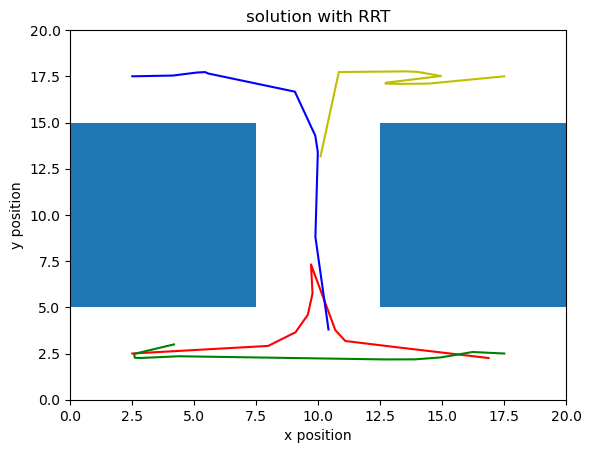

In [3]:
rrt_soln1 = """
2.5 2.5 17.5 2.5 2.5 17.5 17.5 17.5
7.98204 2.91142 16.2254 2.58232 4.1414 17.5425 14.4398 17.1054
9.08323 3.65245 14.9436 2.29013 5.10542 17.7051 13.1598 17.091
9.57783 4.59656 13.8993 2.18513 5.43933 17.7285 12.7058 17.11
9.76843 5.74934 12.6863 2.18038 5.55609 17.6542 12.7391 17.1579
9.7056 7.32156 4.38067 2.35196 9.0569 16.6695 14.9503 17.5151
10.6861 3.76823 2.8293 2.25828 9.87942 14.2875 14.0111 17.7391
11.0905 3.17749 2.60074 2.26999 9.98149 13.3936 13.5494 17.7682
13.0989 2.85091 2.57424 2.48011 9.8836 8.81104 10.8283 17.733
16.8682 2.25552 4.1797 2.99381 10.4125 3.80198 10.0918 13.1719
"""

plot_scenario1_soln("solution with RRT", rrt_soln1)

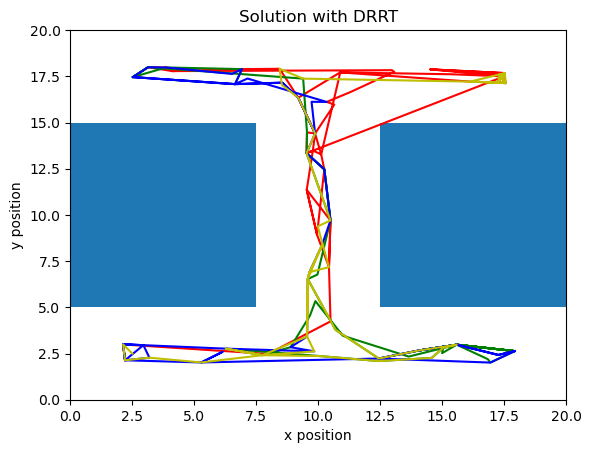

In [4]:
drrt_soln1 = """
2.20765 2.13462 17.2556 2.42368 2.52174 17.4576 17.5 17.5
2.20765 2.13462 17.2556 2.42368 2.52174 17.4576 17.5 17.5
2.20765 2.13462 17.2556 2.42368 2.52174 17.4576 17.5 17.5
2.20765 2.13462 17.2556 2.42368 2.52174 17.4576 17.5 17.5
2.13122 2.9912 15.5833 2.97848 6.64203 17.0774 17.2563 17.2237
2.13122 2.9912 15.5833 2.97848 6.64203 17.0774 17.2563 17.2237
2.13122 2.9912 15.5833 2.97848 6.64203 17.0774 17.2563 17.2237
2.13122 2.9912 15.5833 2.97848 6.64203 17.0774 17.2563 17.2237
7.97869 2.47804 14.0389 2.66018 8.54948 17.1561 17.5161 17.6753
7.97869 2.47804 14.0389 2.66018 8.54948 17.1561 17.5161 17.6753
7.97869 2.47804 14.0389 2.66018 8.54948 17.1561 17.5161 17.6753
7.97869 2.47804 14.0389 2.66018 8.54948 17.1561 17.5161 17.6753
10.4943 4.23968 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
10.4943 4.23968 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
10.4943 4.23968 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
10.4943 4.23968 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
10.4316 7.17465 13.6449 2.33536 9.8712 14.4058 17.56 17.134
10.4316 7.17465 13.6449 2.33536 9.8712 14.4058 17.56 17.134
10.4316 7.17465 13.6449 2.33536 9.8712 14.4058 17.56 17.134
10.4316 7.17465 13.6449 2.33536 9.8712 14.4058 17.56 17.134
10.4926 9.69971 10.9897 3.46294 9.72904 16.1213 17.5161 17.6753
10.4926 9.69971 10.9897 3.46294 9.72904 16.1213 17.5161 17.6753
10.4926 9.69971 10.9897 3.46294 9.72904 16.1213 17.5161 17.6753
10.4926 9.69971 10.9897 3.46294 9.72904 16.1213 17.5161 17.6753
9.53429 11.3588 9.88353 5.33686 10.3406 16.1141 17.2914 17.5977
9.53429 11.3588 9.88353 5.33686 10.3406 16.1141 17.2914 17.5977
9.53429 11.3588 9.88353 5.33686 10.3406 16.1141 17.2914 17.5977
9.53429 11.3588 9.88353 5.33686 10.3406 16.1141 17.2914 17.5977
9.94954 8.93103 9.66435 4.55248 7.14683 17.3798 16.134 17.2141
9.94954 8.93103 9.66435 4.55248 7.14683 17.3798 16.134 17.2141
9.94954 8.93103 9.66435 4.55248 7.14683 17.3798 16.134 17.2141
9.94954 8.93103 9.66435 4.55248 7.14683 17.3798 16.134 17.2141
9.53429 11.3588 8.88094 2.84262 6.64203 17.0774 17.56 17.134
9.53429 11.3588 8.88094 2.84262 6.64203 17.0774 17.56 17.134
9.53429 11.3588 8.88094 2.84262 6.64203 17.0774 17.56 17.134
9.53429 11.3588 8.88094 2.84262 6.64203 17.0774 17.56 17.134
9.78183 13.4839 7.74768 2.41057 6.92588 17.8904 16.134 17.2141
9.78183 13.4839 7.74768 2.41057 6.92588 17.8904 16.134 17.2141
9.78183 13.4839 7.74768 2.41057 6.92588 17.8904 16.134 17.2141
9.78183 13.4839 7.74768 2.41057 6.92588 17.8904 16.134 17.2141
9.8712 14.4058 6.27233 2.76347 6.52007 17.6302 17.56 17.134
9.8712 14.4058 6.27233 2.76347 6.52007 17.6302 17.56 17.134
9.8712 14.4058 6.27233 2.76347 6.52007 17.6302 17.56 17.134
9.8712 14.4058 6.27233 2.76347 6.52007 17.6302 17.56 17.134
10.6456 15.9705 10.0753 2.36061 3.8651 17.979 16.134 17.2141
10.6456 15.9705 10.0753 2.36061 3.8651 17.979 16.134 17.2141
10.6456 15.9705 10.0753 2.36061 3.8651 17.979 16.134 17.2141
10.6456 15.9705 10.0753 2.36061 3.8651 17.979 16.134 17.2141
10.3406 16.1141 12.4351 2.09268 3.13636 17.992 17.56 17.134
10.3406 16.1141 12.4351 2.09268 3.13636 17.992 17.56 17.134
10.3406 16.1141 12.4351 2.09268 3.13636 17.992 17.56 17.134
10.3406 16.1141 12.4351 2.09268 3.13636 17.992 17.56 17.134
11.3203 16.6628 14.5745 2.26169 2.52174 17.4576 16.134 17.2141
11.3203 16.6628 14.5745 2.26169 2.52174 17.4576 16.134 17.2141
11.3203 16.6628 14.5745 2.26169 2.52174 17.4576 16.134 17.2141
11.3203 16.6628 14.5745 2.26169 2.52174 17.4576 16.134 17.2141
13.0632 17.7496 15.0339 2.80971 6.64203 17.0774 17.56 17.134
13.0632 17.7496 15.0339 2.80971 6.64203 17.0774 17.56 17.134
13.0632 17.7496 15.0339 2.80971 6.64203 17.0774 17.56 17.134
13.0632 17.7496 15.0339 2.80971 6.64203 17.0774 17.56 17.134
12.966 17.8319 14.9926 2.52005 8.54948 17.1561 17.2914 17.5977
12.966 17.8319 14.9926 2.52005 8.54948 17.1561 17.2914 17.5977
12.966 17.8319 14.9926 2.52005 8.54948 17.1561 17.2914 17.5977
12.966 17.8319 14.9926 2.52005 8.54948 17.1561 17.2914 17.5977
13.0632 17.7496 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
13.0632 17.7496 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
13.0632 17.7496 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
13.0632 17.7496 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
12.966 17.8319 17.9252 2.63138 9.8712 14.4058 17.56 17.134
12.966 17.8319 17.9252 2.63138 9.8712 14.4058 17.56 17.134
12.966 17.8319 17.9252 2.63138 9.8712 14.4058 17.56 17.134
12.966 17.8319 17.9252 2.63138 9.8712 14.4058 17.56 17.134
4.11383 17.7826 16.936 2.01008 9.52721 13.3422 16.134 17.2141
4.11383 17.7826 16.936 2.01008 9.52721 13.3422 16.134 17.2141
4.11383 17.7826 16.936 2.01008 9.52721 13.3422 16.134 17.2141
4.11383 17.7826 16.936 2.01008 9.52721 13.3422 16.134 17.2141
3.8651 17.979 16.8383 2.19396 10.2427 12.4697 9.39073 17.3752
3.8651 17.979 16.8383 2.19396 10.2427 12.4697 9.39073 17.3752
3.8651 17.979 16.8383 2.19396 10.2427 12.4697 9.39073 17.3752
3.8651 17.979 16.8383 2.19396 10.2427 12.4697 9.39073 17.3752
4.11383 17.7826 15.5833 2.97848 10.4926 9.69971 8.43976 17.907
4.11383 17.7826 15.5833 2.97848 10.4926 9.69971 8.43976 17.907
4.11383 17.7826 15.5833 2.97848 10.4926 9.69971 8.43976 17.907
4.11383 17.7826 15.5833 2.97848 10.4926 9.69971 8.43976 17.907
3.8651 17.979 17.9252 2.63138 10.1469 8.358 8.53241 17.0342
3.8651 17.979 17.9252 2.63138 10.1469 8.358 8.53241 17.0342
3.8651 17.979 17.9252 2.63138 10.1469 8.358 8.53241 17.0342
3.8651 17.979 17.9252 2.63138 10.1469 8.358 8.53241 17.0342
4.11383 17.7826 15.5833 2.97848 9.64425 6.90452 9.19274 16.3422
4.11383 17.7826 15.5833 2.97848 9.64425 6.90452 9.19274 16.3422
4.11383 17.7826 15.5833 2.97848 9.64425 6.90452 9.19274 16.3422
4.11383 17.7826 15.5833 2.97848 9.64425 6.90452 9.19274 16.3422
3.13636 17.992 17.9252 2.63138 9.57471 6.53048 9.8712 14.4058
3.13636 17.992 17.9252 2.63138 9.57471 6.53048 9.8712 14.4058
3.13636 17.992 17.9252 2.63138 9.57471 6.53048 9.8712 14.4058
3.13636 17.992 17.9252 2.63138 9.57471 6.53048 9.8712 14.4058
3.8651 17.979 15.5833 2.97848 9.54872 3.41797 9.52721 13.3422
3.8651 17.979 15.5833 2.97848 9.54872 3.41797 9.52721 13.3422
3.8651 17.979 15.5833 2.97848 9.54872 3.41797 9.52721 13.3422
3.8651 17.979 15.5833 2.97848 9.54872 3.41797 9.52721 13.3422
4.11383 17.7826 14.0389 2.66018 8.88094 2.84262 10.4926 9.69971
4.11383 17.7826 14.0389 2.66018 8.88094 2.84262 10.4926 9.69971
4.11383 17.7826 14.0389 2.66018 8.88094 2.84262 10.4926 9.69971
4.11383 17.7826 14.0389 2.66018 8.88094 2.84262 10.4926 9.69971
6.92588 17.8904 15.5833 2.97848 9.83812 2.61703 9.97732 9.37998
6.92588 17.8904 15.5833 2.97848 9.83812 2.61703 9.97732 9.37998
6.92588 17.8904 15.5833 2.97848 9.83812 2.61703 9.97732 9.37998
6.92588 17.8904 15.5833 2.97848 9.83812 2.61703 9.97732 9.37998
8.43976 17.907 17.9252 2.63138 6.27233 2.76347 10.4316 7.17465
8.43976 17.907 17.9252 2.63138 6.27233 2.76347 10.4316 7.17465
8.43976 17.907 17.9252 2.63138 6.27233 2.76347 10.4316 7.17465
8.43976 17.907 17.9252 2.63138 6.27233 2.76347 10.4316 7.17465
9.19274 16.3422 15.5833 2.97848 2.94798 2.95229 9.64425 6.90452
9.19274 16.3422 15.5833 2.97848 2.94798 2.95229 9.64425 6.90452
9.19274 16.3422 15.5833 2.97848 2.94798 2.95229 9.64425 6.90452
9.19274 16.3422 15.5833 2.97848 2.94798 2.95229 9.64425 6.90452
9.8712 14.4058 17.9252 2.63138 3.19052 2.27493 10.4316 7.17465
9.8712 14.4058 17.9252 2.63138 3.19052 2.27493 10.4316 7.17465
9.8712 14.4058 17.9252 2.63138 3.19052 2.27493 10.4316 7.17465
9.8712 14.4058 17.9252 2.63138 3.19052 2.27493 10.4316 7.17465
10.1172 13.2722 15.5833 2.97848 2.20765 2.13462 9.64425 6.90452
10.1172 13.2722 15.5833 2.97848 2.20765 2.13462 9.64425 6.90452
10.1172 13.2722 15.5833 2.97848 2.20765 2.13462 9.64425 6.90452
10.1172 13.2722 15.5833 2.97848 2.20765 2.13462 9.64425 6.90452
10.2427 12.4697 14.0389 2.66018 2.13122 2.9912 9.57471 6.53048
10.2427 12.4697 14.0389 2.66018 2.13122 2.9912 9.57471 6.53048
10.2427 12.4697 14.0389 2.66018 2.13122 2.9912 9.57471 6.53048
10.2427 12.4697 14.0389 2.66018 2.13122 2.9912 9.57471 6.53048
10.4926 9.69971 15.5833 2.97848 2.94798 2.95229 9.54872 3.41797
10.4926 9.69971 15.5833 2.97848 2.94798 2.95229 9.54872 3.41797
10.4926 9.69971 15.5833 2.97848 2.94798 2.95229 9.54872 3.41797
10.4926 9.69971 15.5833 2.97848 2.94798 2.95229 9.54872 3.41797
10.4316 7.17465 14.0389 2.66018 2.13122 2.9912 9.83812 2.61703
10.4316 7.17465 14.0389 2.66018 2.13122 2.9912 9.83812 2.61703
10.4316 7.17465 14.0389 2.66018 2.13122 2.9912 9.83812 2.61703
10.4316 7.17465 14.0389 2.66018 2.13122 2.9912 9.83812 2.61703
9.94954 8.93103 12.4409 2.22894 2.94798 2.95229 7.74768 2.41057
9.94954 8.93103 12.4409 2.22894 2.94798 2.95229 7.74768 2.41057
9.94954 8.93103 12.4409 2.22894 2.94798 2.95229 7.74768 2.41057
9.94954 8.93103 12.4409 2.22894 2.94798 2.95229 7.74768 2.41057
10.2427 12.4697 10.693 3.78563 2.20765 2.13462 6.27233 2.76347
10.2427 12.4697 10.693 3.78563 2.20765 2.13462 6.27233 2.76347
10.2427 12.4697 10.693 3.78563 2.20765 2.13462 6.27233 2.76347
10.2427 12.4697 10.693 3.78563 2.20765 2.13462 6.27233 2.76347
9.52721 13.3422 9.57471 6.53048 2.13122 2.9912 7.74768 2.41057
9.52721 13.3422 9.57471 6.53048 2.13122 2.9912 7.74768 2.41057
9.52721 13.3422 9.57471 6.53048 2.13122 2.9912 7.74768 2.41057
9.52721 13.3422 9.57471 6.53048 2.13122 2.9912 7.74768 2.41057
9.54508 14.468 9.96614 6.77154 2.20765 2.13462 10.0753 2.36061
9.54508 14.468 9.96614 6.77154 2.20765 2.13462 10.0753 2.36061
9.54508 14.468 9.96614 6.77154 2.20765 2.13462 10.0753 2.36061
9.54508 14.468 9.96614 6.77154 2.20765 2.13462 10.0753 2.36061
9.8712 14.4058 10.4926 9.69971 2.13122 2.9912 12.4351 2.09268
9.8712 14.4058 10.4926 9.69971 2.13122 2.9912 12.4351 2.09268
9.8712 14.4058 10.4926 9.69971 2.13122 2.9912 12.4351 2.09268
9.8712 14.4058 10.4926 9.69971 2.13122 2.9912 12.4351 2.09268
9.19274 16.3422 10.2427 12.4697 2.94798 2.95229 14.5745 2.26169
9.19274 16.3422 10.2427 12.4697 2.94798 2.95229 14.5745 2.26169
9.19274 16.3422 10.2427 12.4697 2.94798 2.95229 14.5745 2.26169
9.19274 16.3422 10.2427 12.4697 2.94798 2.95229 14.5745 2.26169
10.8858 17.7132 9.52721 13.3422 2.13122 2.9912 15.0339 2.80971
10.8858 17.7132 9.52721 13.3422 2.13122 2.9912 15.0339 2.80971
10.8858 17.7132 9.52721 13.3422 2.13122 2.9912 15.0339 2.80971
10.8858 17.7132 9.52721 13.3422 2.13122 2.9912 15.0339 2.80971
16.134 17.2141 10.4926 9.69971 2.20765 2.13462 15.5833 2.97848
16.134 17.2141 10.4926 9.69971 2.20765 2.13462 15.5833 2.97848
16.134 17.2141 10.4926 9.69971 2.20765 2.13462 15.5833 2.97848
16.134 17.2141 10.4926 9.69971 2.20765 2.13462 15.5833 2.97848
17.56 17.134 10.2427 12.4697 5.28362 2.01626 14.0389 2.66018
17.56 17.134 10.2427 12.4697 5.28362 2.01626 14.0389 2.66018
17.56 17.134 10.2427 12.4697 5.28362 2.01626 14.0389 2.66018
17.56 17.134 10.2427 12.4697 5.28362 2.01626 14.0389 2.66018
17.2914 17.5977 9.52721 13.3422 6.13665 2.58783 12.4409 2.22894
17.2914 17.5977 9.52721 13.3422 6.13665 2.58783 12.4409 2.22894
17.2914 17.5977 9.52721 13.3422 6.13665 2.58783 12.4409 2.22894
17.2914 17.5977 9.52721 13.3422 6.13665 2.58783 12.4409 2.22894
14.5146 17.8775 9.54508 14.468 5.28362 2.01626 10.693 3.78563
14.5146 17.8775 9.54508 14.468 5.28362 2.01626 10.693 3.78563
14.5146 17.8775 9.54508 14.468 5.28362 2.01626 10.693 3.78563
14.5146 17.8775 9.54508 14.468 5.28362 2.01626 10.693 3.78563
17.5161 17.6753 9.39073 17.3752 12.4409 2.22894 9.57471 6.53048
17.5161 17.6753 9.39073 17.3752 12.4409 2.22894 9.57471 6.53048
17.5161 17.6753 9.39073 17.3752 12.4409 2.22894 9.57471 6.53048
17.5161 17.6753 9.39073 17.3752 12.4409 2.22894 9.57471 6.53048
14.5146 17.8775 3.13636 17.992 16.936 2.01008 10.1469 8.358
14.5146 17.8775 3.13636 17.992 16.936 2.01008 10.1469 8.358
14.5146 17.8775 3.13636 17.992 16.936 2.01008 10.1469 8.358
14.5146 17.8775 3.13636 17.992 16.936 2.01008 10.1469 8.358
17.5 17.5 2.52174 17.4576 17.9252 2.63138 9.64425 6.90452
17.5 17.5 2.52174 17.4576 17.9252 2.63138 9.64425 6.90452
17.5 17.5 2.52174 17.4576 17.9252 2.63138 9.64425 6.90452
17.5 17.5 2.52174 17.4576 17.9252 2.63138 9.64425 6.90452
9.52721 13.3422 3.13636 17.992 17.2556 2.42368 9.57471 6.53048
9.52721 13.3422 3.13636 17.992 17.2556 2.42368 9.57471 6.53048
9.52721 13.3422 3.13636 17.992 17.2556 2.42368 9.57471 6.53048
9.52721 13.3422 3.13636 17.992 17.2556 2.42368 9.57471 6.53048
9.78183 13.4839 2.52174 17.4576 15.5833 2.97848 9.54872 3.41797
9.78183 13.4839 2.52174 17.4576 15.5833 2.97848 9.54872 3.41797
9.78183 13.4839 2.52174 17.4576 15.5833 2.97848 9.54872 3.41797
9.78183 13.4839 2.52174 17.4576 15.5833 2.97848 9.54872 3.41797
9.97223 13.3614 6.64203 17.0774 14.0389 2.66018 7.74768 2.41057
9.97223 13.3614 6.64203 17.0774 14.0389 2.66018 7.74768 2.41057
9.97223 13.3614 6.64203 17.0774 14.0389 2.66018 7.74768 2.41057
9.97223 13.3614 6.64203 17.0774 14.0389 2.66018 7.74768 2.41057
9.78183 13.4839 6.92588 17.8904 12.4409 2.22894 5.28362 2.01626
9.78183 13.4839 6.92588 17.8904 12.4409 2.22894 5.28362 2.01626
9.78183 13.4839 6.92588 17.8904 12.4409 2.22894 5.28362 2.01626
9.78183 13.4839 6.92588 17.8904 12.4409 2.22894 5.28362 2.01626
9.97223 13.3614 3.8651 17.979 14.0389 2.66018 3.19052 2.27493
9.97223 13.3614 3.8651 17.979 14.0389 2.66018 3.19052 2.27493
9.97223 13.3614 3.8651 17.979 14.0389 2.66018 3.19052 2.27493
9.97223 13.3614 3.8651 17.979 14.0389 2.66018 3.19052 2.27493
10.1172 13.2722 2.52174 17.4576 15.5833 2.97848 2.20765 2.13462
10.1172 13.2722 2.52174 17.4576 15.5833 2.97848 2.20765 2.13462
10.1172 13.2722 2.52174 17.4576 15.5833 2.97848 2.20765 2.13462
10.1172 13.2722 2.52174 17.4576 15.5833 2.97848 2.20765 2.13462
10.8858 17.7132 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
10.8858 17.7132 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
10.8858 17.7132 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
10.8858 17.7132 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
15.3587 17.6115 2.52174 17.4576 17.9252 2.63138 2.5 2.5
15.3587 17.6115 2.52174 17.4576 17.9252 2.63138 2.5 2.5
15.3587 17.6115 2.52174 17.4576 17.9252 2.63138 2.5 2.5
15.3587 17.6115 2.52174 17.4576 17.9252 2.63138 2.5 2.5
17.5 17.5 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
17.5 17.5 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
17.5 17.5 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
17.5 17.5 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
17.56 17.134 2.52174 17.4576 17.9252 2.63138 2.5 2.5
"""

plot_scenario1_soln("Solution with DRRT", drrt_soln1)

In [5]:
animate_scenario1("Solution with DRRT", drrt_soln1)

![SegmentLocal](scenario1.gif "segment")

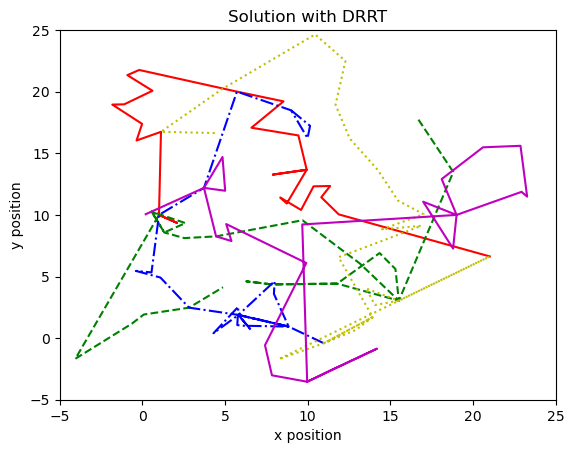

In [6]:
drrt_soln2 = """
21.0082 6.63075 16.6949 17.732 8.99465 18.4895 4.36879 16.6469 0.19756 10.0561
21.0082 6.63075 16.6949 17.732 8.99465 18.4895 4.36879 16.6469 0.19756 10.0561
21.0082 6.63075 16.6949 17.732 8.99465 18.4895 4.36879 16.6469 0.19756 10.0561
21.0082 6.63075 16.6949 17.732 8.99465 18.4895 4.36879 16.6469 0.19756 10.0561
21.0082 6.63075 16.6949 17.732 8.99465 18.4895 4.36879 16.6469 0.19756 10.0561
11.8734 10.0435 18.8006 13.4845 10.1373 17.2295 1.12166 16.7456 3.71991 12.1954
11.8734 10.0435 18.8006 13.4845 10.1373 17.2295 1.12166 16.7456 3.71991 12.1954
11.8734 10.0435 18.8006 13.4845 10.1373 17.2295 1.12166 16.7456 3.71991 12.1954
11.8734 10.0435 18.8006 13.4845 10.1373 17.2295 1.12166 16.7456 3.71991 12.1954
11.8734 10.0435 18.8006 13.4845 10.1373 17.2295 1.12166 16.7456 3.71991 12.1954
10.8163 11.4313 15.5076 3.03963 9.98742 16.2282 4.82226 20.2155 5.00341 11.9622
10.8163 11.4313 15.5076 3.03963 9.98742 16.2282 4.82226 20.2155 5.00341 11.9622
10.8163 11.4313 15.5076 3.03963 9.98742 16.2282 4.82226 20.2155 5.00341 11.9622
10.8163 11.4313 15.5076 3.03963 9.98742 16.2282 4.82226 20.2155 5.00341 11.9622
10.8163 11.4313 15.5076 3.03963 9.98742 16.2282 4.82226 20.2155 5.00341 11.9622
11.3535 12.3454 11.7789 4.42385 8.99465 18.4895 10.4435 24.6505 4.84301 14.7026
11.3535 12.3454 11.7789 4.42385 8.99465 18.4895 10.4435 24.6505 4.84301 14.7026
11.3535 12.3454 11.7789 4.42385 8.99465 18.4895 10.4435 24.6505 4.84301 14.7026
11.3535 12.3454 11.7789 4.42385 8.99465 18.4895 10.4435 24.6505 4.84301 14.7026
11.3535 12.3454 11.7789 4.42385 8.99465 18.4895 10.4435 24.6505 4.84301 14.7026
10.3498 12.3217 7.82981 4.35924 5.71434 20.0077 12.2752 22.497 3.71991 12.1954
10.3498 12.3217 7.82981 4.35924 5.71434 20.0077 12.2752 22.497 3.71991 12.1954
10.3498 12.3217 7.82981 4.35924 5.71434 20.0077 12.2752 22.497 3.71991 12.1954
10.3498 12.3217 7.82981 4.35924 5.71434 20.0077 12.2752 22.497 3.71991 12.1954
10.3498 12.3217 7.82981 4.35924 5.71434 20.0077 12.2752 22.497 3.71991 12.1954
9.59361 10.4041 6.27432 4.61114 3.71991 12.1954 11.6775 18.935 4.4532 8.25704
9.59361 10.4041 6.27432 4.61114 3.71991 12.1954 11.6775 18.935 4.4532 8.25704
9.59361 10.4041 6.27432 4.61114 3.71991 12.1954 11.6775 18.935 4.4532 8.25704
9.59361 10.4041 6.27432 4.61114 3.71991 12.1954 11.6775 18.935 4.4532 8.25704
9.59361 10.4041 6.27432 4.61114 3.71991 12.1954 11.6775 18.935 4.4532 8.25704
8.33481 11.4102 7.82981 4.35924 1 10 12.541 16.198 5.38337 7.87933
8.33481 11.4102 7.82981 4.35924 1 10 12.541 16.198 5.38337 7.87933
8.33481 11.4102 7.82981 4.35924 1 10 12.541 16.198 5.38337 7.87933
8.33481 11.4102 7.82981 4.35924 1 10 12.541 16.198 5.38337 7.87933
8.33481 11.4102 7.82981 4.35924 1 10 12.541 16.198 5.38337 7.87933
8.72834 10.9267 11.7789 4.42385 0.547823 5.33219 14.2275 13.6611 5.06652 9.25847
8.72834 10.9267 11.7789 4.42385 0.547823 5.33219 14.2275 13.6611 5.06652 9.25847
8.72834 10.9267 11.7789 4.42385 0.547823 5.33219 14.2275 13.6611 5.06652 9.25847
8.72834 10.9267 11.7789 4.42385 0.547823 5.33219 14.2275 13.6611 5.06652 9.25847
8.72834 10.9267 11.7789 4.42385 0.547823 5.33219 14.2275 13.6611 5.06652 9.25847
9.93498 13.6654 14.3418 6.90403 -0.398036 5.45648 15.4578 11.1614 9.9093 6.09666
9.93498 13.6654 14.3418 6.90403 -0.398036 5.45648 15.4578 11.1614 9.9093 6.09666
9.93498 13.6654 14.3418 6.90403 -0.398036 5.45648 15.4578 11.1614 9.9093 6.09666
9.93498 13.6654 14.3418 6.90403 -0.398036 5.45648 15.4578 11.1614 9.9093 6.09666
9.93498 13.6654 14.3418 6.90403 -0.398036 5.45648 15.4578 11.1614 9.9093 6.09666
7.89126 13.2726 15.3019 5.6114 1.08674 4.91721 17.0021 10.0572 7.41265 -0.576905
7.89126 13.2726 15.3019 5.6114 1.08674 4.91721 17.0021 10.0572 7.41265 -0.576905
7.89126 13.2726 15.3019 5.6114 1.08674 4.91721 17.0021 10.0572 7.41265 -0.576905
7.89126 13.2726 15.3019 5.6114 1.08674 4.91721 17.0021 10.0572 7.41265 -0.576905
7.89126 13.2726 15.3019 5.6114 1.08674 4.91721 17.0021 10.0572 7.41265 -0.576905
9.93498 13.6654 15.5076 3.03963 2.81985 2.47249 14.4909 8.82899 7.83295 -3.01934
9.93498 13.6654 15.5076 3.03963 2.81985 2.47249 14.4909 8.82899 7.83295 -3.01934
9.93498 13.6654 15.5076 3.03963 2.81985 2.47249 14.4909 8.82899 7.83295 -3.01934
9.93498 13.6654 15.5076 3.03963 2.81985 2.47249 14.4909 8.82899 7.83295 -3.01934
9.93498 13.6654 15.5076 3.03963 2.81985 2.47249 14.4909 8.82899 7.83295 -3.01934
9.43277 16.4529 13.1513 6.05539 5.80584 1.88382 16.8567 9.11811 9.96347 -3.54026
9.43277 16.4529 13.1513 6.05539 5.80584 1.88382 16.8567 9.11811 9.96347 -3.54026
9.43277 16.4529 13.1513 6.05539 5.80584 1.88382 16.8567 9.11811 9.96347 -3.54026
9.43277 16.4529 13.1513 6.05539 5.80584 1.88382 16.8567 9.11811 9.96347 -3.54026
9.43277 16.4529 13.1513 6.05539 5.80584 1.88382 16.8567 9.11811 9.96347 -3.54026
6.59323 17.0776 9.67945 9.56668 8.84225 0.936225 14.9058 8.09949 11.4163 -2.59278
6.59323 17.0776 9.67945 9.56668 8.84225 0.936225 14.9058 8.09949 11.4163 -2.59278
6.59323 17.0776 9.67945 9.56668 8.84225 0.936225 14.9058 8.09949 11.4163 -2.59278
6.59323 17.0776 9.67945 9.56668 8.84225 0.936225 14.9058 8.09949 11.4163 -2.59278
6.59323 17.0776 9.67945 9.56668 8.84225 0.936225 14.9058 8.09949 11.4163 -2.59278
8.53298 19.2173 4.4532 8.25704 7.95189 3.59165 11.8648 6.56686 14.188 -0.853199
8.53298 19.2173 4.4532 8.25704 7.95189 3.59165 11.8648 6.56686 14.188 -0.853199
8.53298 19.2173 4.4532 8.25704 7.95189 3.59165 11.8648 6.56686 14.188 -0.853199
8.53298 19.2173 4.4532 8.25704 7.95189 3.59165 11.8648 6.56686 14.188 -0.853199
8.53298 19.2173 4.4532 8.25704 7.95189 3.59165 11.8648 6.56686 14.188 -0.853199
5.71434 20.0077 2.52407 8.12036 7.99512 4.6233 13.9252 1.70547 9.96347 -3.54026
5.71434 20.0077 2.52407 8.12036 7.99512 4.6233 13.9252 1.70547 9.96347 -3.54026
5.71434 20.0077 2.52407 8.12036 7.99512 4.6233 13.9252 1.70547 9.96347 -3.54026
5.71434 20.0077 2.52407 8.12036 7.99512 4.6233 13.9252 1.70547 9.96347 -3.54026
5.71434 20.0077 2.52407 8.12036 7.99512 4.6233 13.9252 1.70547 9.96347 -3.54026
-0.196905 21.7658 1.31894 8.5755 5.80584 1.88382 10.9719 -0.415176 9.6667 9.22599
-0.196905 21.7658 1.31894 8.5755 5.80584 1.88382 10.9719 -0.415176 9.6667 9.22599
-0.196905 21.7658 1.31894 8.5755 5.80584 1.88382 10.9719 -0.415176 9.6667 9.22599
-0.196905 21.7658 1.31894 8.5755 5.80584 1.88382 10.9719 -0.415176 9.6667 9.22599
-0.196905 21.7658 1.31894 8.5755 5.80584 1.88382 10.9719 -0.415176 9.6667 9.22599
-0.912409 21.3449 0.550661 10.27 8.84225 0.936225 13.9252 1.70547 19 10
-0.912409 21.3449 0.550661 10.27 8.84225 0.936225 13.9252 1.70547 19 10
-0.912409 21.3449 0.550661 10.27 8.84225 0.936225 13.9252 1.70547 19 10
-0.912409 21.3449 0.550661 10.27 8.84225 0.936225 13.9252 1.70547 19 10
-0.912409 21.3449 0.550661 10.27 8.84225 0.936225 13.9252 1.70547 19 10
0.605499 20.0788 1.31894 8.5755 5.80584 1.88382 12.9132 0.664893 22.9299 11.8739
0.605499 20.0788 1.31894 8.5755 5.80584 1.88382 12.9132 0.664893 22.9299 11.8739
0.605499 20.0788 1.31894 8.5755 5.80584 1.88382 12.9132 0.664893 22.9299 11.8739
0.605499 20.0788 1.31894 8.5755 5.80584 1.88382 12.9132 0.664893 22.9299 11.8739
0.605499 20.0788 1.31894 8.5755 5.80584 1.88382 12.9132 0.664893 22.9299 11.8739
-1.10153 18.9766 2.59959 9.33602 6.58122 0.626998 10.9719 -0.415176 23.2679 11.4846
-1.10153 18.9766 2.59959 9.33602 6.58122 0.626998 10.9719 -0.415176 23.2679 11.4846
-1.10153 18.9766 2.59959 9.33602 6.58122 0.626998 10.9719 -0.415176 23.2679 11.4846
-1.10153 18.9766 2.59959 9.33602 6.58122 0.626998 10.9719 -0.415176 23.2679 11.4846
-1.10153 18.9766 2.59959 9.33602 6.58122 0.626998 10.9719 -0.415176 23.2679 11.4846
-1.82303 18.9557 0.550661 10.27 5.80584 1.88382 8.25193 -1.70812 22.8658 15.6097
-1.82303 18.9557 0.550661 10.27 5.80584 1.88382 8.25193 -1.70812 22.8658 15.6097
-1.82303 18.9557 0.550661 10.27 5.80584 1.88382 8.25193 -1.70812 22.8658 15.6097
-1.82303 18.9557 0.550661 10.27 5.80584 1.88382 8.25193 -1.70812 22.8658 15.6097
-1.82303 18.9557 0.550661 10.27 5.80584 1.88382 8.25193 -1.70812 22.8658 15.6097
-0.0201409 17.3893 1 10 4.29695 0.397858 15.5076 3.03963 20.5962 15.4875
-0.0201409 17.3893 1 10 4.29695 0.397858 15.5076 3.03963 20.5962 15.4875
-0.0201409 17.3893 1 10 4.29695 0.397858 15.5076 3.03963 20.5962 15.4875
-0.0201409 17.3893 1 10 4.29695 0.397858 15.5076 3.03963 20.5962 15.4875
-0.0201409 17.3893 1 10 4.29695 0.397858 15.5076 3.03963 20.5962 15.4875
-0.356583 16.0409 -4.05786 -1.67504 5.80327 2.55672 14.0714 2.68803 18.1007 12.9105
-0.356583 16.0409 -4.05786 -1.67504 5.80327 2.55672 14.0714 2.68803 18.1007 12.9105
-0.356583 16.0409 -4.05786 -1.67504 5.80327 2.55672 14.0714 2.68803 18.1007 12.9105
-0.356583 16.0409 -4.05786 -1.67504 5.80327 2.55672 14.0714 2.68803 18.1007 12.9105
-0.356583 16.0409 -4.05786 -1.67504 5.80327 2.55672 14.0714 2.68803 18.1007 12.9105
1.12166 16.7456 -0.633824 1.18025 5.73645 1.06369 13.5146 4.03645 19 10
1.12166 16.7456 -0.633824 1.18025 5.73645 1.06369 13.5146 4.03645 19 10
1.12166 16.7456 -0.633824 1.18025 5.73645 1.06369 13.5146 4.03645 19 10
1.12166 16.7456 -0.633824 1.18025 5.73645 1.06369 13.5146 4.03645 19 10
1.12166 16.7456 -0.633824 1.18025 5.73645 1.06369 13.5146 4.03645 19 10
1 10 0.0818509 1.91565 5.97943 1.0082 15.5076 3.03963 18.788 7.26545
1 10 0.0818509 1.91565 5.97943 1.0082 15.5076 3.03963 18.788 7.26545
1 10 0.0818509 1.91565 5.97943 1.0082 15.5076 3.03963 18.788 7.26545
1 10 0.0818509 1.91565 5.97943 1.0082 15.5076 3.03963 18.788 7.26545
1 10 0.0818509 1.91565 5.97943 1.0082 15.5076 3.03963 18.788 7.26545
2.09234 9.35168 2.81985 2.47249 8.84225 0.936225 21.0082 6.63075 16.9788 11.0726
2.09234 9.35168 2.81985 2.47249 8.84225 0.936225 21.0082 6.63075 16.9788 11.0726
2.09234 9.35168 2.81985 2.47249 8.84225 0.936225 21.0082 6.63075 16.9788 11.0726
2.09234 9.35168 2.81985 2.47249 8.84225 0.936225 21.0082 6.63075 16.9788 11.0726
2.09234 9.35168 2.81985 2.47249 8.84225 0.936225 21.0082 6.63075 16.9788 11.0726
1 10 4.87306 4.12994 10.9719 -0.415176 15.5076 3.03963 19 10
"""

plot_scenario2_soln("Solution with DRRT", drrt_soln2, robot_count=5)

In [7]:
animate_scenario2("Solution with DRRT", drrt_soln2, robot_count=5)

![SegmentLocal](scenario2.gif "segment")

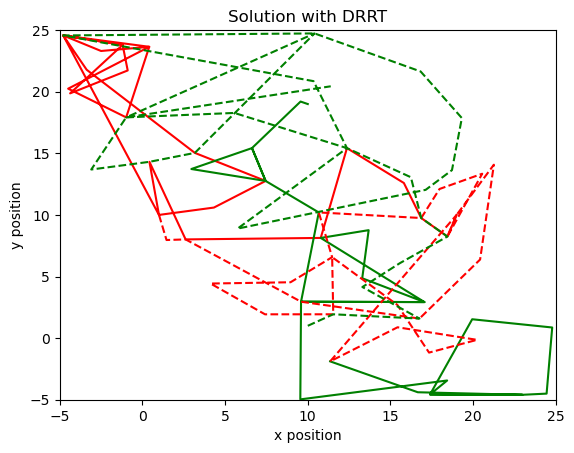

In [8]:
drrt_soln3 = """
19 10 10 19 1 10 10 1
18.4461 8.24569 9.56369 19.2021 1 10 11.5399 1.93492
18.4461 8.24569 9.56369 19.2021 1 10 11.5399 1.93492
18.4461 8.24569 9.56369 19.2021 1 10 11.5399 1.93492
18.4461 8.24569 9.56369 19.2021 1 10 11.5399 1.93492
16.8607 9.7485 6.62509 15.4241 1.45604 7.96383 16.7556 1.58734
16.8607 9.7485 6.62509 15.4241 1.45604 7.96383 16.7556 1.58734
16.8607 9.7485 6.62509 15.4241 1.45604 7.96383 16.7556 1.58734
16.8607 9.7485 6.62509 15.4241 1.45604 7.96383 16.7556 1.58734
15.8122 12.5907 2.95777 13.726 2.61153 8.01226 13.3036 4.1487
15.8122 12.5907 2.95777 13.726 2.61153 8.01226 13.3036 4.1487
15.8122 12.5907 2.95777 13.726 2.61153 8.01226 13.3036 4.1487
15.8122 12.5907 2.95777 13.726 2.61153 8.01226 13.3036 4.1487
12.3702 15.4211 7.45151 12.7569 9.59261 2.95536 15.5803 6.09263
12.3702 15.4211 7.45151 12.7569 9.59261 2.95536 15.5803 6.09263
12.3702 15.4211 7.45151 12.7569 9.59261 2.95536 15.5803 6.09263
12.3702 15.4211 7.45151 12.7569 9.59261 2.95536 15.5803 6.09263
10.7836 8.13246 6.62509 15.4241 16.7556 1.58734 18.4461 8.24569
10.7836 8.13246 6.62509 15.4241 16.7556 1.58734 18.4461 8.24569
10.7836 8.13246 6.62509 15.4241 16.7556 1.58734 18.4461 8.24569
10.7836 8.13246 6.62509 15.4241 16.7556 1.58734 18.4461 8.24569
2.61153 8.01226 7.45151 12.7569 20.4225 6.37856 16.8607 9.7485
2.61153 8.01226 7.45151 12.7569 20.4225 6.37856 16.8607 9.7485
2.61153 8.01226 7.45151 12.7569 20.4225 6.37856 16.8607 9.7485
2.61153 8.01226 7.45151 12.7569 20.4225 6.37856 16.8607 9.7485
0.422995 14.3104 10.6648 10.2018 21.2566 14.0778 16.2369 13.0585
0.422995 14.3104 10.6648 10.2018 21.2566 14.0778 16.2369 13.0585
0.422995 14.3104 10.6648 10.2018 21.2566 14.0778 16.2369 13.0585
0.422995 14.3104 10.6648 10.2018 21.2566 14.0778 16.2369 13.0585
1 10 9.59261 2.95536 19 10 12.3702 15.4211
1 10 9.59261 2.95536 19 10 12.3702 15.4211
1 10 9.59261 2.95536 19 10 12.3702 15.4211
1 10 9.59261 2.95536 19 10 12.3702 15.4211
4.32292 10.5974 17.0585 2.92517 18.4461 8.24569 10.3485 20.8587
4.32292 10.5974 17.0585 2.92517 18.4461 8.24569 10.3485 20.8587
4.32292 10.5974 17.0585 2.92517 18.4461 8.24569 10.3485 20.8587
4.32292 10.5974 17.0585 2.92517 18.4461 8.24569 10.3485 20.8587
7.45151 12.7569 13.2932 4.85877 20.5501 13.3435 -4.79276 24.568
7.45151 12.7569 13.2932 4.85877 20.5501 13.3435 -4.79276 24.568
7.45151 12.7569 13.2932 4.85877 20.5501 13.3435 -4.79276 24.568
7.45151 12.7569 13.2932 4.85877 20.5501 13.3435 -4.79276 24.568
3.16899 15.0343 13.6819 8.76299 17.9679 12.1055 10.4113 24.7324
3.16899 15.0343 13.6819 8.76299 17.9679 12.1055 10.4113 24.7324
3.16899 15.0343 13.6819 8.76299 17.9679 12.1055 10.4113 24.7324
3.16899 15.0343 13.6819 8.76299 17.9679 12.1055 10.4113 24.7324
-3.37293 21.7828 10.7836 8.13246 16.8607 9.7485 16.8268 21.6419
-3.37293 21.7828 10.7836 8.13246 16.8607 9.7485 16.8268 21.6419
-3.37293 21.7828 10.7836 8.13246 16.8607 9.7485 16.8268 21.6419
-3.37293 21.7828 10.7836 8.13246 16.8607 9.7485 16.8268 21.6419
-4.79276 24.568 17.0585 2.92517 10.6648 10.2018 19.3191 17.8633
-4.79276 24.568 17.0585 2.92517 10.6648 10.2018 19.3191 17.8633
-4.79276 24.568 17.0585 2.92517 10.6648 10.2018 19.3191 17.8633
-4.79276 24.568 17.0585 2.92517 10.6648 10.2018 19.3191 17.8633
0.412272 23.6463 9.59261 2.95536 11.4746 6.57204 18.7215 13.6367
0.412272 23.6463 9.59261 2.95536 11.4746 6.57204 18.7215 13.6367
0.412272 23.6463 9.59261 2.95536 11.4746 6.57204 18.7215 13.6367
0.412272 23.6463 9.59261 2.95536 11.4746 6.57204 18.7215 13.6367
-0.983941 17.9171 9.54874 -4.97179 8.95669 4.53488 17.1308 12.037
-0.983941 17.9171 9.54874 -4.97179 8.95669 4.53488 17.1308 12.037
-0.983941 17.9171 9.54874 -4.97179 8.95669 4.53488 17.1308 12.037
-0.983941 17.9171 9.54874 -4.97179 8.95669 4.53488 17.1308 12.037
-4.49346 20.2476 18.4302 -3.43893 4.11739 4.43086 5.75446 8.88872
-4.49346 20.2476 18.4302 -3.43893 4.11739 4.43086 5.75446 8.88872
-4.49346 20.2476 18.4302 -3.43893 4.11739 4.43086 5.75446 8.88872
-4.49346 20.2476 18.4302 -3.43893 4.11739 4.43086 5.75446 8.88872
0.412272 23.6463 17.397 -4.56814 7.41318 1.93215 12.3702 15.4211
0.412272 23.6463 17.397 -4.56814 7.41318 1.93215 12.3702 15.4211
0.412272 23.6463 17.397 -4.56814 7.41318 1.93215 12.3702 15.4211
0.412272 23.6463 17.397 -4.56814 7.41318 1.93215 12.3702 15.4211
-2.50432 23.3067 22.9753 -4.59989 11.5399 1.93492 5.56032 18.2781
-2.50432 23.3067 22.9753 -4.59989 11.5399 1.93492 5.56032 18.2781
-2.50432 23.3067 22.9753 -4.59989 11.5399 1.93492 5.56032 18.2781
-2.50432 23.3067 22.9753 -4.59989 11.5399 1.93492 5.56032 18.2781
-4.79276 24.568 17.397 -4.56814 11.4746 6.57204 -0.983941 17.9171
-4.79276 24.568 17.397 -4.56814 11.4746 6.57204 -0.983941 17.9171
-4.79276 24.568 17.397 -4.56814 11.4746 6.57204 -0.983941 17.9171
-4.79276 24.568 17.397 -4.56814 11.4746 6.57204 -0.983941 17.9171
-1.1984 23.7998 19.9453 1.53169 15.4175 2.69708 10.4113 24.7324
-1.1984 23.7998 19.9453 1.53169 15.4175 2.69708 10.4113 24.7324
-1.1984 23.7998 19.9453 1.53169 15.4175 2.69708 10.4113 24.7324
-1.1984 23.7998 19.9453 1.53169 15.4175 2.69708 10.4113 24.7324
-4.37541 19.8658 24.784 0.863102 17.3349 -1.1747 3.16899 15.0343
-4.37541 19.8658 24.784 0.863102 17.3349 -1.1747 3.16899 15.0343
-4.37541 19.8658 24.784 0.863102 17.3349 -1.1747 3.16899 15.0343
-4.37541 19.8658 24.784 0.863102 17.3349 -1.1747 3.16899 15.0343
-0.891423 21.7256 24.4449 -4.50489 20.2381 -0.140057 0.422995 14.3104
-0.891423 21.7256 24.4449 -4.50489 20.2381 -0.140057 0.422995 14.3104
-0.891423 21.7256 24.4449 -4.50489 20.2381 -0.140057 0.422995 14.3104
-0.891423 21.7256 24.4449 -4.50489 20.2381 -0.140057 0.422995 14.3104
-1.1984 23.7998 22.9753 -4.59989 15.4306 0.879944 -3.09557 13.6866
-1.1984 23.7998 22.9753 -4.59989 15.4306 0.879944 -3.09557 13.6866
-1.1984 23.7998 22.9753 -4.59989 15.4306 0.879944 -3.09557 13.6866
-1.1984 23.7998 22.9753 -4.59989 15.4306 0.879944 -3.09557 13.6866
-4.79276 24.568 16.6545 -4.394 11.3539 -1.88712 -0.983941 17.9171
-4.79276 24.568 16.6545 -4.394 11.3539 -1.88712 -0.983941 17.9171
-4.79276 24.568 16.6545 -4.394 11.3539 -1.88712 -0.983941 17.9171
-4.79276 24.568 16.6545 -4.394 11.3539 -1.88712 -0.983941 17.9171
1 10 11.3539 -1.88712 19 10 11.3893 20.4403
"""

plot_scenario3_soln("Solution with DRRT", drrt_soln3, robot_count=4)

In [9]:
animate_scenario3("Solution with DRRT", drrt_soln3, robot_count=4)

![SegmentLocal](scenario3.gif "segment")